# Requirment

In [ ]:
import cv2
import numpy as np
from PIL import Image

# Q1

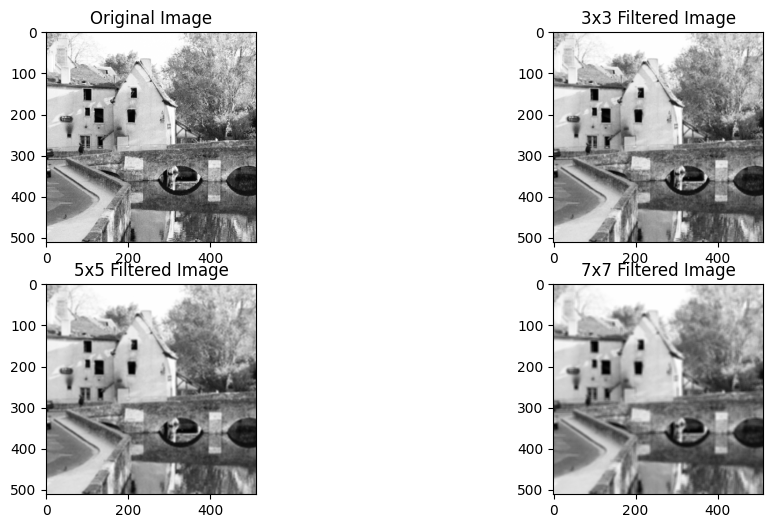

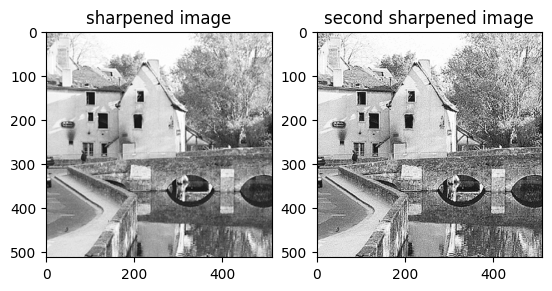

In [29]:


# Load the GIF image with Pillow
img_pil = Image.open('bridge.GIF').convert('L')  # Convert to grayscale
img = np.array(img_pil)  # Convert to a NumPy array for OpenCV compatibility
img_normalized = img / 255.0  # Normalized to range [0, 1]

# Define the different sized filters
kernel_3x3 = np.array([[1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9]])

kernel_5x5 = np.ones((5,5), np.float32) / 25

kernel_7x7 = np.ones((7,7), np.float32) / 49

# Apply filters
img_3x3 = cv2.filter2D(img, -1, kernel_3x3)
img_5x5 = cv2.filter2D(img, -1, kernel_5x5)
img_7x7 = cv2.filter2D(img, -1, kernel_7x7)

# Display the filtered images
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


plt.subplot(2,2,2)
plt.imshow(img_3x3, cmap='gray')
plt.title('3x3 Filtered Image')

plt.subplot(2,2,3)
plt.imshow(img_5x5, cmap='gray')
plt.title('5x5 Filtered Image')

plt.subplot(2,2,4)
plt.imshow(img_7x7, cmap='gray')
plt.title('7x7 Filtered Image')

plt.show()



# Sharpen the 3x3 filtered image
laplacian_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

sharpened_img = cv2.filter2D(img_3x3, -1, laplacian_kernel)

# Rescale to improve visibility
sharpened_img = cv2.convertScaleAbs(sharpened_img)

# Display the sharpened image
plt.subplot(1,2,1)
plt.imshow(sharpened_img, cmap='gray')
plt.title('sharpened image')


# Apply a second sharpening step
second_sharpened_img = cv2.filter2D(sharpened_img, -1, laplacian_kernel)
second_sharpened_img = cv2.convertScaleAbs(second_sharpened_img)

# Display the second sharpened image
plt.subplot(1,2,2)
plt.imshow(second_sharpened_img, cmap='gray')
plt.title('second sharpened image')

plt.show()


# Q2

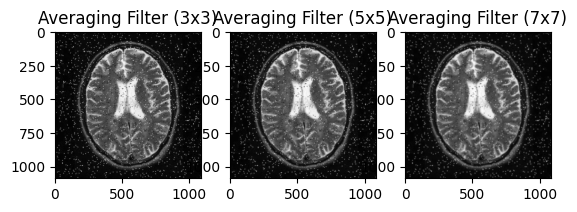

In [37]:

# Read the image
img = cv2.imread('brain.png', 0)

# Define kernel sizes
kernel_sizes = [3, 5, 7]
i=0
# Apply averaging filters
for kernel_size in kernel_sizes:
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    i=i+1
    filtered_img = cv2.filter2D(img, -1, kernel)
    plt.subplot(2, 3, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Averaging Filter ({kernel_size}x{kernel_size})')


plt.show()

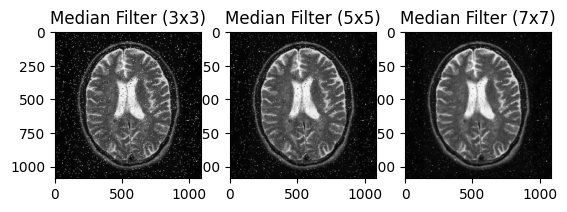

In [39]:
# Apply median filters
i=0
for kernel_size in kernel_sizes:
    filtered_img = cv2.medianBlur(img, kernel_size)
    i=i+1
    plt.subplot(2, 3, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f'Median Filter ({kernel_size}x{kernel_size})')

plt.show()

# Q3

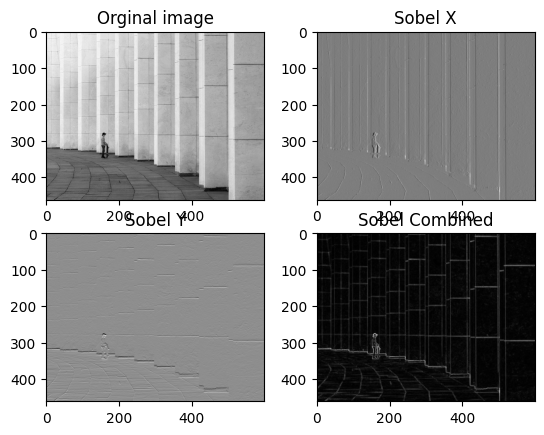

In [43]:

# Read the image
img = cv2.imread('Edge.jpg', 0)

# Apply Sobel filters in x and y directions
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Combine the x and y gradients
sobelxy = cv2.magnitude(sobelx, sobely)

# Display the results

plt.subplot(2,2,1)
plt.imshow(img ,cmap='gray')
plt.title('Orginal image')

plt.subplot(2,2,2)
plt.imshow(sobelx ,cmap='gray')
plt.title('Sobel X')

plt.subplot(2,2,3)
plt.imshow(sobely ,cmap='gray')
plt.title('Sobel Y')

plt.subplot(2,2,4)
plt.imshow(sobelxy ,cmap='gray')
plt.title('Sobel Combined')

plt.show()

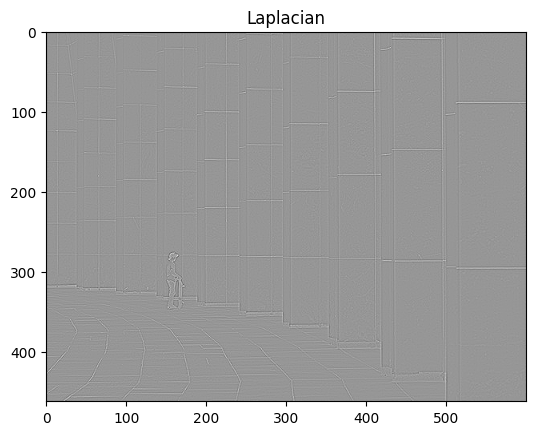

In [44]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Display the Laplacian result
plt.imshow( laplacian,cmap='gray')
plt.title('Laplacian')
plt.show()

# Q4

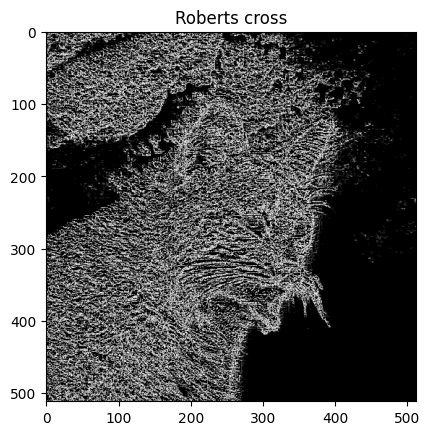

In [54]:

# Read the image
# Load the GIF image with Pillow
img_pil = Image.open('cat.gif').convert('L')  # Convert to grayscale
img = np.array(img_pil)  # Convert to a NumPy array for OpenCV compatibility
#img_normalized = img / 255.0  # Normalized to range [0, 1]

# Create the Roberts Cross kernels
kernel_x = np.array([[1, 0],
                     [0, -1]])
kernel_y = np.array([[0, 1],
                     [-1, 0]])

# Apply the kernels to the image
img_x = cv2.filter2D(img, -1, kernel_x)
img_y = cv2.filter2D(img, -1, kernel_y)

# Combine the results
img_robert = np.sqrt(np.square(img_x) + np.square(img_y))


plt.imshow(img_robert,cmap='gray')
plt.title('Roberts cross')
plt.show()

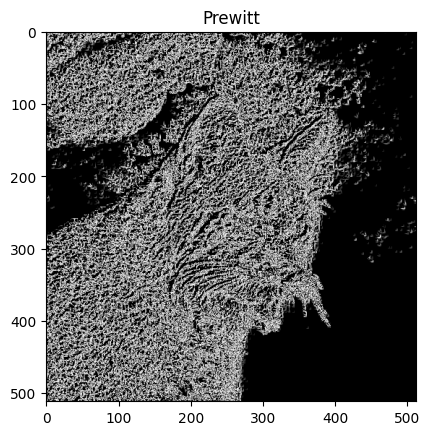

In [52]:
# Create the Prewitt kernels
kernel_x = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])
kernel_y = np.array([[1, 1, 1],
                     [0, 0, 0],
                     [-1, -1, -1]])

# Apply the kernels to the image
img_x = cv2.filter2D(img, -1, kernel_x)
img_y = cv2.filter2D(img, -1, kernel_y)

# Combine the results
img_prewitt = np.sqrt(np.square(img_x) + np.square(img_y))


plt.imshow(img_prewitt,cmap='gray')
plt.title('Prewitt')
plt.show()

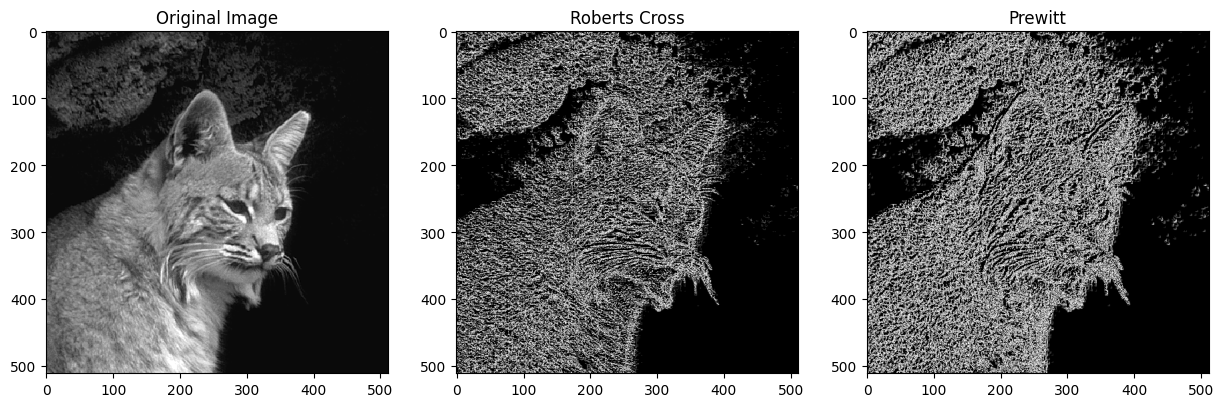

In [55]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Display the images
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_robert, cmap='gray')
axs[1].set_title('Roberts Cross')
axs[2].imshow(img_prewitt, cmap='gray')
axs[2].set_title('Prewitt')

plt.show()

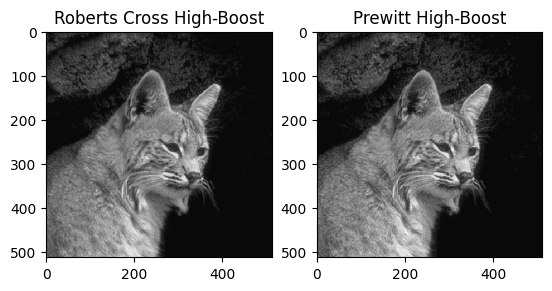

In [58]:
# High-boost filter
A = 2  # Adjust this value to control the amount of sharpening
img_robert_hb = img + A * img_robert
img_prewitt_hb = img + A * img_prewitt

# Display the high-boosted images
plt.subplot(1,2,1)
plt.imshow( img_robert_hb,cmap='gray')
plt.title('Roberts Cross High-Boost')
plt.subplot(1,2,2)
plt.imshow( img_prewitt_hb, cmap='gray')
plt.title('Prewitt High-Boost')
plt.show()

# Q5

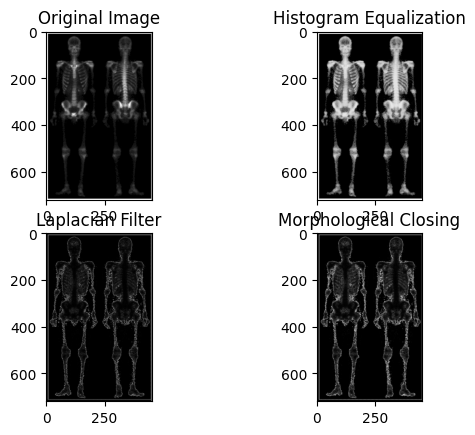

In [64]:

# Read the image
img = cv2.imread('skeleton.png', 0)

# Histogram equalization
equ = cv2.equalizeHist(img)

# Laplacian filter
laplacian = cv2.Laplacian(equ, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

# Morphological closing
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(laplacian, cv2.MORPH_CLOSE, kernel)

# Display the results

plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(equ,cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2,2,3)
plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian Filter')

plt.subplot(2,2,4)
plt.imshow(closing,cmap='gray')
plt.title('Morphological Closing')

plt.show()
